In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


# Set that the color channel value will be first
K.set_image_data_format("channels_last")
# Set seed
np.random.seed(0)

# Set image information
channels = 1
height = 28
width = 28
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()
# Reshape training image data into features (Tensorflow only supports NHWC on CPU)
data_train = data_train.reshape(data_train.shape[0], height, width, channels)
# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], height, width, channels)
# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255
# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]
# Start neural network
network = Sequential()
# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(height, width, channels), activation='relu'))
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer
network.add(Dropout(0.5))
# Add layer to flatten input
network.add(Flatten())
# Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))
# Add dropout layer
network.add(Dropout(0.5))
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))
# Compile neural network

network.compile(loss="categorical_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric
# Train neural network
network.fit(features_train, # Features
 target_train, # Target
 epochs=2, # Number of epochs
 verbose=0, # Don't print description after each epoch
 batch_size=1000, # Number of observations per batch
 validation_data=(features_test, target_test)) # Data for evaluation

In [24]:
import matplotlib.pyplot as plt

bild = data_test[0]
#print(data_test.shape)
#print(bild.shape)
predictions = network.predict(data_test)

(28, 28, 1)


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


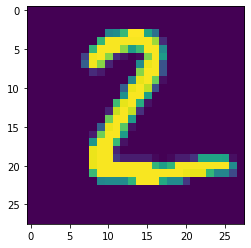

In [26]:
bild = data_test[1]
plt.imshow(bild)
print(predictions[1])
print(target_test[1])